In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# start from main funtion
# if __name__ == "__main__":
stock_max, stock_min, stock_close, stock_amount = np.loadtxt('.\\SH600000.txt', delimiter='\t', skiprows=2, usecols=(2, 3, 4, 5), unpack=True)

N = 100
stock_close = stock_close[:N]
print(stock_close)

[ 10.06  10.15   9.91   9.63   9.76   9.76   9.83   9.25   9.34   9.38
   9.5    9.56   9.23   9.63   9.89   9.63   9.76   9.27   9.18   9.13
   8.89   8.91   9.29   9.15   9.01   8.89   9.01   9.17   9.14   9.24
   9.17   9.05   9.15   9.79  10.12   9.97   9.76  10.06  10.34  10.36
  10.42  10.66  10.54  10.56  10.31  10.69  11.12  11.    11.04  11.08
  11.12  11.    10.88  11.1   10.79  11.15  11.06  10.99  10.57   9.69
   9.68   9.86   9.47   9.59   9.63   9.42   9.47   9.7    9.47   9.54
   8.79   8.5    8.75   8.62   8.88   9.18   9.     8.56   8.97   8.92
   8.71   8.9    9.2    8.85   8.83   8.95   8.84   8.49   8.42   8.41
   8.29   8.27   7.96   7.82   8.47   8.15   8.24   8.26   8.3    8.75]


In [4]:
n = 10
weight = np.ones(n)
weight /= weight.sum()
print(weight)
stock_sma = np.convolve(stock_close, weight, mode='valid')  # simple moving average

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]


In [5]:
weight = np.linspace(1, 0, n)
weight = np.exp(weight)
weight /= weight.sum()
print(weight)
stock_ema = np.convolve(stock_close, weight, mode='valid')  # exponential moving average

[ 0.15676742  0.14028165  0.12552954  0.11232876  0.10051619  0.08994584
  0.08048708  0.072023    0.06444901  0.05767151]


In [7]:
t = np.arange(n-1, N)
poly = np.polyfit(t, stock_ema, 10)
print(poly)
stock_ema_hat = np.polyval(poly, t)

[ -3.90332584e-17   2.30775522e-14  -4.50228216e-12   2.70284472e-10
   2.27100804e-08  -4.47475229e-06   2.85044205e-04  -9.00626259e-03
   1.47414463e-01  -1.19476973e+00   1.33572046e+01]


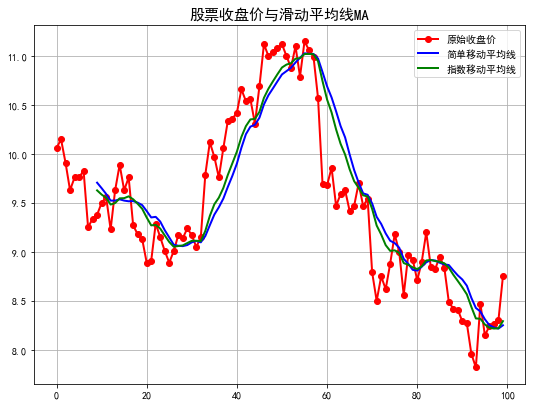

In [10]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8.8, 6.6), facecolor='w')
plt.plot(np.arange(N), stock_close, 'ro-', linewidth=2, label='原始收盘价')
t = np.arange(n-1, N)
plt.plot(t, stock_sma, 'b-', linewidth=2, label='简单移动平均线')
plt.plot(t, stock_ema, 'g-', linewidth=2, label='指数移动平均线')
plt.legend(loc='upper right')
plt.title('股票收盘价与滑动平均线MA', fontsize=15)
plt.grid(True)
plt.show()

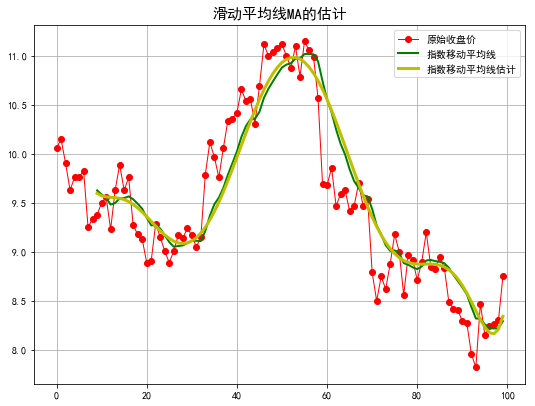

In [13]:
plt.figure(figsize=(8.8, 6.6), facecolor='w')
plt.plot(np.arange(N), stock_close, 'ro-', linewidth=1, label='原始收盘价')
plt.plot(t, stock_ema, 'g-', linewidth=2, label='指数移动平均线')
plt.plot(t, stock_ema_hat, 'y-', linewidth=3, label='指数移动平均线估计')
plt.legend(loc='upper right')
plt.title('滑动平均线MA的估计', fontsize=15)
plt.grid(True)
plt.show()